# This file is used for exploring this specific data 


In [1]:
import os
import yaml
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from nir_interactance_loader import NIRInteractanceLoader


In [2]:
def load_yaml_file(file_path):
    with open(file_path, 'r') as file:
        data = yaml.safe_load(file)
    return data

In [3]:

cfg_dir = "/home/aneesh/sandbox/multi-modal/mangos/eda/config"
cfg_f   = "nir_interactance.yaml"
cfg_filepath = os.path.join(cfg_dir, cfg_f)

cfg = load_yaml_file(cfg_filepath)


In [4]:
nir_cfg = cfg['nir_interactance']

In [5]:
loader = NIRInteractanceLoader(nir_cfg, normalize=True)
loader.load()

In [6]:
df = loader.get_features()
ids = loader.get_ids()

# ids
df

1         2         3         4         5         6         7    \
0    8.731530  8.641868  8.328499  8.173350  7.791742  8.301157  8.465458   
1    8.838624  8.749875  8.457337  8.313492  7.975520  8.416688  8.562147   
2    8.781555  8.691701  8.379677  8.229143  7.865810  8.347342  8.505384   
3    8.694569  8.602894  8.276827  8.121985  7.720329  8.264028  8.436504   
4    8.693748  8.605058  8.281015  8.127266  7.726742  8.271428  8.441931   
..        ...       ...       ...       ...       ...       ...       ...   
479  9.116348  9.032075  8.715306  8.546985  8.154270  8.665768  8.829548   
480  8.948118  8.861081  8.505546  8.326142  7.843241  8.490603  8.684198   
481  8.940799  8.850231  8.486445  8.304235  7.808169  8.469326  8.667611   
482  8.920536  8.833871  8.472907  8.294495  7.796379  8.466195  8.669021   
483  8.945137  8.863078  8.510007  8.332356  7.856397  8.500352  8.694536   

          8         9         10   ...       236       237       238  \
0    8.251369  8.406373  8.448743  ...  8.379355  8.250150  8.402343   
1    8.368508  8.513627  8.550086  ...  8.401221  8.273727  8.427028   
2    8.298527  8.452121  8.489061  ...  8.392605  8.269660  8.419801   
3    8.214113  8.376781  8.415249  ...  8.371404  8.240657  8.391108   
4    8.220995  8.383548  8.424244  ...  8.356602  8.222427  8.373207   
..        ...       ...       ...  ...       ...       ...       ...   
479  8.611812  8.777478  8.821216  ...  8.470835  8.294599  8.498194   
480  8.428449  8.623605  8.672674  ...  8.419889  8.224016  8.432245   
481  8.412854  8.606723  8.658102  ...  8.421255  8.233046  8.433159   
482  8.406887  8.605222  8.655929  ...  8.406284  8.211605  8.414518   
483  8.439275  8.631628  8.678785  ...  8.407936  8.213707  8.419404   

          239       240       241       242       243       244       245  
0    8.439124  8.427903  8.635136  8.495132  8.480716  8.104864  8.425560  
1    8.462145  8.459606  8.663749  8.528628  8.513286  8.138427  8.438842  
2    8.456657  8.449621  8.657755  8.518912  8.504027  8.132789  8.439015  
3    8.424288  8.415382  8.624378  8.477142  8.467036  8.089390  8.417373  
4    8.405412  8.394099  8.606650  8.451950  8.445891  8.062391  8.408605  
..        ...       ...       ...       ...       ...       ...       ...  
479  8.543231  8.534424  8.791060  8.615444  8.602728  8.108884  8.535524  
480  8.472280  8.453209  8.720199  8.523593  8.516553  7.998712  8.500942  
481  8.474703  8.459903  8.724955  8.529043  8.520189  8.006684  8.501064  
482  8.454424  8.432093  8.703075  8.503115  8.494764  7.983481  8.489843  
483  8.458907  8.434941  8.706854  8.504148  8.500434  7.980547  8.489925  

[484 rows x 245 columns]

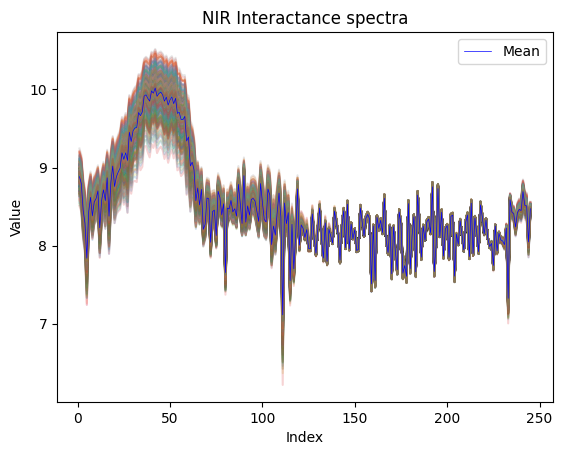

In [7]:
for row in range(len(df)):
#     print (row)
    plt.plot(df.iloc[row,:], alpha=0.2)

# Calculate and plot the mean
mean_values = df.mean(axis=0)

#Plot also the mean
plt.plot(mean_values.iloc[:], color='blue', linewidth=0.5, label='Mean')


# Adding legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('NIR Interactance spectra')

plt.show()


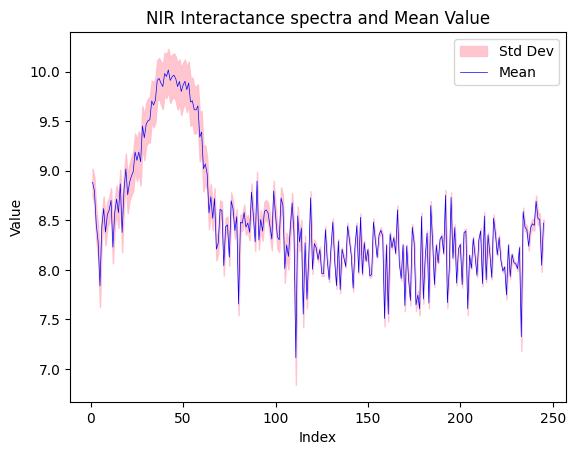

In [8]:
std_dev = df.std(axis=0)
# Plot the standard deviation as a shaded area
plt.fill_between(mean_values.index[:], 
                 mean_values.iloc[:] - std_dev.iloc[:], 
                 mean_values.iloc[:] + std_dev.iloc[:], 
                 color='pink', alpha=0.9, label='Std Dev')

#plot mean
#Plot also the mean
plt.plot(mean_values.iloc[:], color='blue', linewidth=0.5, label='Mean')

# Adding legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('NIR Interactance spectra and Mean Value')


plt.show()



In [9]:
# Noramlizations

In [10]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
# Fit and transform the data
# df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) #Apply normalization over cols
# df_normalized = pd.DataFrame(scaler.fit_transform(df.T).T, columns=df.columns) #Apply normalization over rows
df_normalized = pd.DataFrame(scaler.fit_transform(df.T).T, columns=df.columns) #Apply normalization over rows

In [11]:
df_normalized

1         2         3         4         5         6         7    \
0    0.599241  0.427077 -0.174636 -0.472545 -1.205287 -0.227137  0.088344   
1    0.627063  0.471319 -0.042051 -0.294482 -0.887583 -0.113386  0.141879   
2    0.617453  0.452443 -0.120562 -0.397004 -1.064235 -0.179943  0.110288   
3    0.603314  0.418327 -0.239623 -0.552069 -1.362548 -0.265449  0.082579   
4    0.587137  0.409782 -0.238209 -0.545663 -1.346595 -0.257380  0.083575   
..        ...       ...       ...       ...       ...       ...       ...   
479  0.691238  0.573436  0.130644 -0.104643 -0.653597  0.061398  0.290336   
480  0.657507  0.520809 -0.037582 -0.319347 -1.077774 -0.061050  0.243003   
481  0.650783  0.509682 -0.057075 -0.340948 -1.113792 -0.083747  0.225171   
482  0.635952  0.497953 -0.076819 -0.360910 -1.154073 -0.087508  0.235459   
483  0.650940  0.520931 -0.038452 -0.319912 -1.073992 -0.053750  0.253903   

          8         9         10   ...       236       237       238  \
0   -0.322737 -0.025107  0.056249  ... -0.076985 -0.325078 -0.032845   
1   -0.197936  0.056731  0.120713  ... -0.140528 -0.364265 -0.095240   
2   -0.269587  0.012476  0.080313  ... -0.096821 -0.322599 -0.046878   
3   -0.366170 -0.037932  0.039690  ... -0.048782 -0.312609 -0.009022   
4   -0.358232 -0.033174  0.048208  ... -0.087058 -0.355367 -0.053851   
..        ...       ...       ...  ...       ...       ...       ...   
479 -0.014025  0.217551  0.278689  ... -0.211089 -0.457439 -0.172845   
480 -0.158666  0.147838  0.224905  ... -0.172111 -0.479742 -0.152705   
481 -0.171726  0.130311  0.210357  ... -0.158638 -0.451856 -0.140092   
482 -0.181944  0.133870  0.214611  ... -0.182905 -0.492897 -0.169794   
483 -0.150517  0.154236  0.228948  ... -0.200168 -0.507893 -0.181999   

          239       240       241       242       243       244       245  
0    0.037778  0.016233  0.414151  0.145322  0.117642 -0.604047  0.011735  
1   -0.033613 -0.038068  0.320178  0.083056  0.056132 -0.601700 -0.074507  
2    0.020806  0.007884  0.390104  0.135131  0.107796 -0.573951 -0.011592  
3    0.057930  0.039958  0.461679  0.164580  0.144188 -0.617840  0.043976  
4    0.010549 -0.012075  0.412966  0.103612  0.091494 -0.675394  0.016934  
..        ...       ...       ...       ...       ...       ...       ...  
479 -0.109890 -0.122202  0.236536 -0.008947 -0.026722 -0.717040 -0.120664  
480 -0.089828 -0.119779  0.299546 -0.009238 -0.020294 -0.833597 -0.044812  
481 -0.075369 -0.098426  0.314510  0.009289 -0.004505 -0.804516 -0.034300  
482 -0.106250 -0.141809  0.289683 -0.028719 -0.042016 -0.856145 -0.049852  
483 -0.119413 -0.157382  0.273420 -0.047735 -0.053621 -0.877297 -0.070270  

[484 rows x 245 columns]

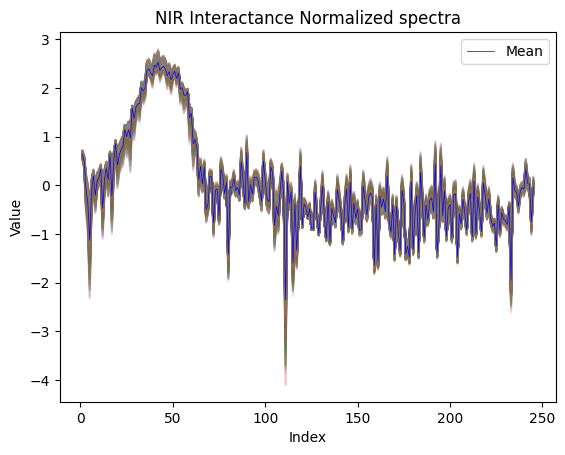

In [12]:
for row in range(len(df)):
#     print (row)
    plt.plot(df_normalized.iloc[row,:], alpha=0.2)

# Calculate and plot the mean
mean_values = df_normalized.mean(axis=0)

#Plot also the mean
plt.plot(mean_values.iloc[:], color='blue', linewidth=0.5, label='Mean')


# Adding legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('NIR Interactance Normalized spectra')

plt.show()


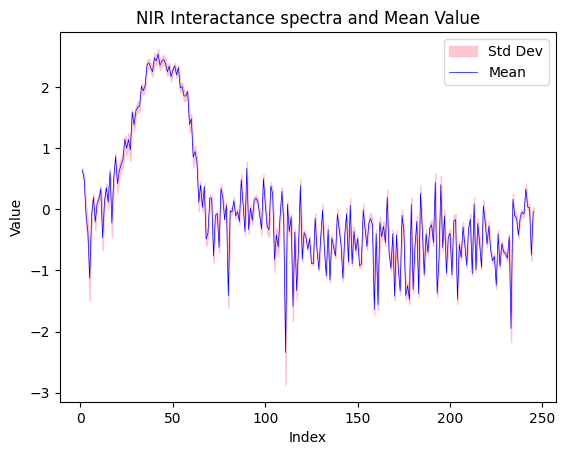

In [13]:
std_dev = df_normalized.std(axis=0)
# Plot the standard deviation as a shaded area
plt.fill_between(mean_values.index[:], 
                 mean_values.iloc[:] - std_dev.iloc[:], 
                 mean_values.iloc[:] + std_dev.iloc[:], 
                 color='pink', alpha=0.9, label='Std Dev')

#plot mean
#Plot also the mean
plt.plot(mean_values.iloc[:], color='blue', linewidth=0.5, label='Mean')

# Adding legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('NIR Interactance spectra and Mean Value')


plt.show()

tensor([8.7586, 8.6740, 8.3966, 8.2586, 7.9443, 8.3621, 8.5078, 8.3218, 8.4565,
        8.4941, 8.5744, 8.2046, 8.4790, 8.5902, 8.4788, 8.7208, 8.3341, 8.6772,
        8.8555, 8.6475, 8.7546, 8.8131, 8.8596, 9.0311, 8.9687, 9.0485, 8.9802,
        9.2893, 9.1980, 9.3206, 9.3612, 9.3806, 9.5503, 9.5211, 9.5692, 9.7417,
        9.7629, 9.7303, 9.7057, 9.8176, 9.7964, 9.8506, 9.7631, 9.7922, 9.8037,
        9.7700, 9.7011, 9.7370, 9.6510, 9.6984, 9.7243, 9.6483, 9.7011, 9.5350,
        9.5380, 9.4554, 9.4437, 9.4661, 9.1838, 9.2034, 8.8696, 8.8899, 8.7975,
        8.4588, 8.5914, 8.4157, 8.5748, 8.1681, 8.2163, 8.4871, 8.4767, 8.0445,
        8.3456, 8.3618, 8.1087, 8.5554, 8.4909, 8.3144, 8.4278, 7.7840, 8.3819,
        8.3736, 8.4587, 8.3436, 8.3745, 8.2971, 8.6288, 8.4316, 8.2231, 8.7216,
        8.2361, 8.4023, 8.3051, 8.4677, 8.4799, 8.4521, 8.3441, 8.2420, 8.6356,
        8.4348, 8.2629, 8.2382, 8.5765, 8.5125, 8.0199, 8.2011, 8.1089, 8.3282,
        8.5335, 8.2882, 7.4593, 8.4332, 

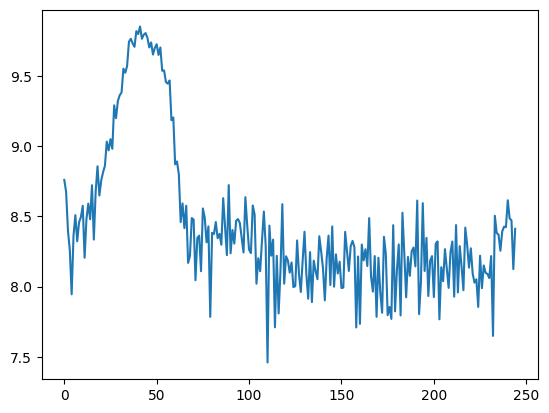

In [14]:
idx = 10

d = loader[idx]
print(d)

plt.plot(d)
plt.show()

In [15]:
data = [d for d in loader]

Could not retreive the feature for id 0. 0
Could not retreive the feature for id 195. 195
Could not retreive the feature for id 242. 242
Could not retreive the feature for id 288. 288
Could not retreive the feature for id 396. 396
Could not retreive the feature for id 404. 404
Could not retreive the feature for id 454. 454


Could not retreive the feature for id 0. 0
Could not retreive the feature for id 195. 195
Could not retreive the feature for id 242. 242
Could not retreive the feature for id 288. 288
Could not retreive the feature for id 396. 396
Could not retreive the feature for id 404. 404
Could not retreive the feature for id 454. 454


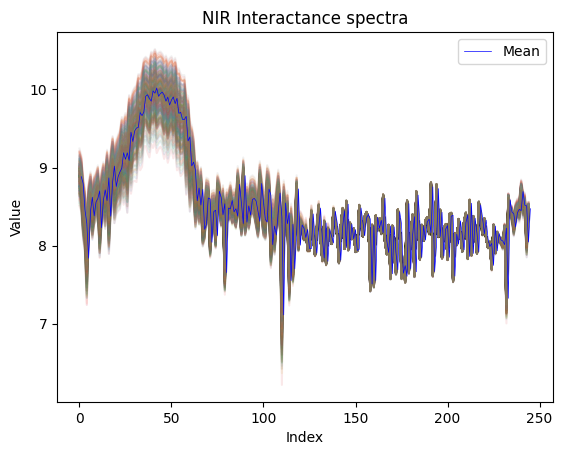

In [16]:
#Cheking the getitem functionality of the loader

data = [d for d in loader]

for d in data:
    if d is None:
        pass
    else:
        plt.plot(d, alpha=0.1)



# Calculate and plot the mean
mean_values = df.mean(axis=0)

#Plot also the mean
plt.plot(mean_values.iloc[:], color='blue', linewidth=0.5, label='Mean')


# Adding legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('NIR Interactance spectra')

plt.show()
